# Statistical Modelling

## Learning Objectives

#### Part I - Simple Linear Regression
- High-level Overview of Linear Regression
- R syntax
- Principles of a regression model
- Residuals
- Non-linear Relationships

#### Part II - Multivariate Linear Regression
- Correlation
- Coefficients and interpreting coefficients
- Finding relevant features/Removing non-significant terms
- Categorical variables
- Interactions
- Normality
- Power transformations

Whilst the learning objectives above seem to indicate this being a lengthy and complex notebook - that is not the case. However, this is one of the most important notebooks in this chapter as it'll provide a rigorous framework to analyse your data against. I have done my best to provide the information here in a concise and intuitive manner, avoiding a math overload unless it is foundational to understanding the problem.

We will work mostly in the order that is outlined in the learning objectives, starting from a simple dataset to illustrate  the problems/challenges before moving on to some more realistic datasets. All these problems are introduced under a linear regression umbrella.

For logistic regression or multi-class classification, SOME of these techniques are less applicable. Similarly, whilst the assumptions for a linear regression model are not the same as the tree based models, when working with the tree based models, I recommend performing the applicable methodologies, as they will:<br>
1. help you understand your data better<br>
2. help boost your metrics of your models. 

Furthermore, there are multiple libraries with wide arrays of syntax for statistical models. sklearn is one of them. Here, I will introduce another library `statsmodels` as it allows us to use an **R** like syntax for defining our models. The reason I chose this was three-fold:<br>
1. It is a powerful, concise and expressive way to define the variables relevant to your model.<br>
2. R is one of the most popular Data Science/Statistics libraries out there. Whilst we don't cover R in this course, a gentle introduction to some of its syntax could prove worthwhile if you ever have to work with it.<br>
3. Programming! Exposure to a variaty of libraries will leave you with a broader range of tools to use depending on the situation.

## Linear Regression

Perhaps the most basic form of linear regression is given as:
$$
\hat{y}_i = \beta_Wx_i + \beta_b
$$
And we can describe our target variable fully in this way:
$$
y_i = Wx_i + b + \epsilon_i
$$

Can you spot the difference?

Where $x$ is one explanatory variable, which contains multiple samples enumerated by $i$. $\hat{y}_i$ is the response variable for the $i$'th $x$ variable. $\beta_W$ and $\beta_b$ are the parameterised weights and biases respectively, learned from fitting a model. The $\epsilon$ variable stands for random/inherent error in the samples. We will provide a conceptualisation for this in a second.

As a simple example to demonstrate the concepts that will be introduced, we will be working with a data set of Sea Ice Extent in the Artic, looking at the per year value. The full data can be found [here](https://nsidc.org/data/seaice_index/archives). Here, I've extracted out the data that is relevant for this exercise, specifically September monthly data for the Artic, up to the year 2012.

In [1]:
import pandas as pd

years_range = list(range(1979, 2013))
# Extent is of unit millions of square km
extent = [7.05, 7.67, 7.14, 7.3, 7.39, 6.81, 6.7, 7.41, 7.28, 7.37, 7.01, 6.14, 6.47, 7.47, 6.4, 7.14, 6.08, 7.58, 6.69, 6.54, 6.12, 6.25, 6.73, 5.83, 6.12, 5.98, 5.5, 5.86, 4.27, 4.69, 5.26, 4.87, 4.56, 3.57]

ice_df = pd.DataFrame(list(zip(years_range, extent)), columns=["Year", "Extent"])
ice_df

,Year,Extent
0,1979,7.05
1,1980,7.67
2,1981,7.14
3,1982,7.30
4,1983,7.39
5,1984,6.81
6,1985,6.70
7,1986,7.41
8,1987,7.28
9,1988,7.37


We'll start by plotting the data:

In [2]:
import plotly.express as px

px.scatter(ice_df, "Year", "Extent", title="Year vs Sea Ice Extent (Million sq KM)")

Ok, so we see a strong decreasing trend that looks like we could model with a straight line. Let's try simple linear regression to determine whether the decline is statistically significant. We will use `Ordinary Least Squares` Regression.

### Error
These values were taken on an arbitrary day in September. Notice that the values for the sea ice extent could have been  different if we measured them on different months or days of the month. If so, the resulting $W$ and $b$ would be slightly different. Thus, $W$ and $b$ are not true values, but estimates with *error* associated to them.

Our population model could be written as: $y_i = Wx_i + b + \epsilon_i$ where $W$ and $b$ are the true weights and biases, estimated by $\beta_W$ and $\beta_b$ from our sample data. As was introduced previously, we should think about forming a hypothesis to generalise the results from our sample to the population.

- H0: W = 0. There is no linear change in the amount of sea ice over the years
- Ha: W $\neq$ 0. There is a linear change in the amount of sea ice over the years

Great! Let's fit a line and test our hypothesis. As mentioned in the beginning of this notebook, we'll use the `statsmodels` library and introduce a new syntax. Have a look at its [ user guide](https://www.statsmodels.org/devel/user-guide.html).

N.B. We don't *need* to use R like syntax to use `statsmodels`. In fact it is only supported thanks to another library called [Patsy](https://patsy.readthedocs.io/en/latest/). If you enjoy this syntax and/or need a reference for more information, definitely check out their documentation!

The general formula syntax is given as `Y ~ X1 + X2 + X3` where Y is an *endogenous* (i.e. target/response/dependant) variable and the different X's are different *exogenous* (i.e. explanatory/design/independant/predictive) variables.

In [3]:
import statsmodels.formula.api as smf

model = smf.ols(formula="Extent ~ Year", data=ice_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Extent   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     77.68
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           4.53e-10
Time:                        18:01:24   Log-Likelihood:                -27.953
No. Observations:                  34   AIC:                             59.91
Df Residuals:                      32   BIC:                             62.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    180.8159     19.797      9.134      0.0

So for our ice data, the fitted model which attempts to predict the extent of sea ice given the year is given as:

$$
\hat{\text{Extent}} = 180.82 - 0.0874\text{Year}
$$

The above formula means that for every 1 year increase, there is a decrease of the extent of sea ice by 0.0874 million sq km. In other words, $87,400 km^2$ per year. We will use the `.fittedvalues` attribute to extract our line, which we'll subsequently plot with Plotly.

N.B. We could use Plotly Express to plot these models, but Plotly's `graph_objects` API will probably be a bit more convinient to work with.

In [4]:
import plotly.graph_objects as go

ice_df["fitted"] = model.fittedvalues

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=ice_df["Year"], y=ice_df["Extent"], name="Year vs Sea Ice Extent (million sq km)", mode="markers"))
fig.add_trace(go.Scatter(
    x=ice_df["Year"], y=ice_df["fitted"], name="Fitted Regression Line"))
fig.update_layout(title="Regression line of Year vs Sea Ice Extent (million sq km)", xaxis_title="Year",
    yaxis_title="Sea Ice Extent")
fig.show()

Note: the intercept doesn't actually make sense because it is beyond the range of the data. We should redefine the Year variable subtracting the earliest year (1979), so that our x axis starts at 0.

In [10]:
ice_df["YearAdj"] = ice_df["Year"] - 1979
model = smf.ols(formula="Extent ~ YearAdj", data=ice_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Extent   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     77.68
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           4.53e-10
Time:                        18:33:02   Log-Likelihood:                -27.953
No. Observations:                  34   AIC:                             59.91
Df Residuals:                      32   BIC:                             62.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7736      0.190     40.819      0.0

As seen the intercept is naturally more interpretable now, while the coefficient of stays the same

In [5]:
import plotly.graph_objects as go

ice_df["fitted"] = model.fittedvalues

fig = go.Figure()
# Note that we still plot against the original Year variable
fig.add_trace(go.Scatter(
    x=ice_df["Year"], y=ice_df["Extent"], name="Year vs Sea Ice Extent (million sq km)", mode="markers"))
fig.add_trace(go.Scatter(
    x=ice_df["Year"], y=ice_df["fitted"], name="Fitted Regression Line"))
fig.update_layout(title="Regression line of Year vs Sea Ice Extent (million sq km)", xaxis_title="Year",
    yaxis_title="Sea Ice Extent")
fig.show()

Taking another look at the summary table, there is a column called `P>|t|`. This is the probability of the value of the coefficient being drawn from a parameterised t-distribution. Our `p-value`.
(Unfortunately) `statsmodels` `.summary()` method only provides the value to 3 decimal places - enough to validate whether we want to accept or reject the null hypothesis. However, if we wanted the actual p-values, we can simply run the `.pvalues` attribute against the model.

The p-value for our coefficient of choice is (roughly) 0, which is less than our default significance level, $\alpha = 0.05$. Therefore, **we can reject the null hypothesis** and determine that there is a linear change in the amount of sea ice over the years.

<br>

<details>
    <summary><b>> Click here to reveal how to calculate the p-values using the standard error</b></summary>
    <ul>
        <li>First, divide the parameter value by its standard error. We get a t-value. In this case, -0.08743927/0.0099207 = -8.814</li>
        <li>This value is compared to a t-distribution with (n-p) degrees of freedom, where n is the number datapoints and p is the number of parameters. Here, the number of datapoints is 34, and the number of parameters is 2. Thus, the t-distribution will have 32 degrees of freedom.</li>
        <li>Now we just need to know what the probability of t being greater or equal to 8.814 (absolute value). We can do this using the <a href="http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html">stats</a>class from scipy: <code>stats.t.sf(abs_t_value, DoF)*2</code>, where we multiply by 2 due to our test being two tailed.
    </ul>
</details>

In [6]:
print("Model P Values:", model.pvalues.values)
print("Model Coef:", model.params.values)
print("Model Std Errs:", model.bse.values)

from scipy import stats
t_val = model.params[1]/model.bse[1]
p_val = stats.t.sf(abs(t_val), len(ice_df)-2)*2
print()
print("Calculated P Value: ", p_val)

Model P Values: [1.98401808e-10 4.52791516e-10]
Model Coef: [ 1.80815939e+02 -8.74392666e-02]
Model Std Errs: [1.97969884e+01 9.92069614e-03]

Calculated P Value:  4.527915156455447e-10


## Principles of a regression model

Ok, so we've just used a linear regression model. But we haven't yet discussed assumptions that underlie these kinds of models. Different resources will give a different number of assumptions, but they all have their roots with these four:<br>
1. **Linearity** of the relationship between response and explanatory variables<br>
2. **Statistical independance of residuals**. That is, there's no discernable pattern in the residuals (or no correlation between the consecutive errors in the case of time series data)<br>
3. **Homoescedasicity**. Complicated word, but not a complicated definition. Basically just means that the residuals have constant/very similar variance<br>
4. **Normality** of the error distribution.

As we progress through this notebook, these will be more formally introduced. We'll take a quick jump start by analysing the residuals of the data though. Recall that a **residual** simply is an error we've calculated over *sample* data. Although you may see them being used interchangbly, technically speaking, an *error* is the term used to denote an error calculated over population data.

In [7]:
# Creating a general plotting function for plotting a scatter plot and line on the same figure
def plot_scatter_and_line(x, scatter_y, line_y, scatter_name, line_name, title, x_title, y_title):

    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=x, y=scatter_y, name=scatter_name, mode="markers"))
    fig.add_trace(go.Scatter(
        x=x, y=line_y, name=line_name))
    fig.update_layout(title=title, xaxis_title=x_title,
        yaxis_title=y_title)
    
    return fig

In [8]:
ice_df["residuals"] = model.resid
# This is just a straight line at y = 0 so we can more easily discern positive and negative residuals
line_y = [0] * len(ice_df["Year"])
plot_scatter_and_line(ice_df["Year"], ice_df["residuals"], line_y, "Model residuals", "y=0", "Model Residual Plot of Year vs Ice Extent", "Year", "Residuals")

From the principles we outlined above, you wouldn't be blamed for thinking we hit criteria 2 and 3 (we'll talk about criteria 1 next, and 4 later on). I would say that this data does exhibit homoscedasicity (criterion 3). Regarding criterion 2 - the statistical independance of residuals, at a first glance it does look like the residuals are independant. However, there is a very loose pattern of negative residuals followed by positive residuals followed negative, followed by positive. This could indicate some curvature in the relationship - something we'll investigate now.

## "Non-linear"/Polynomial relationships

It may not always be correct to assume a straight line/linear relationship between two variables. Considering this ice dataset, we may expect some curvature between the ice extent and year (global warming is more prevalent in recent years). We can use linear regression to model non-linear relationships (e.g. polynomial).

I'm going to very slightly switch up notations to something we can use more generally for this notebook. $\beta$ will generally refer to a parameter. $\beta_b$ will refer to the bias, whereas $\beta_\cdot$ will refer to the respective weights/coefficients of our explanatory variables.Under this notation, we could model a quadratic relationship as (does this remind you of $Y = ax^2 + bx + c$? 😉):

$$
\hat{y_i} = \beta_1x_i^2 + \beta_2x_i + \beta_b + \epsilon_{i}
$$

We'll form our null hypothesis, and then code this up!

- H0: $\beta_1 = 0$. There is no evidence of an accelerating decline of sea ice (i.e. no evidence of curvature)
- Ha: $\beta_1 \neq 0$. There is evidence of an accelerating decline of sea ice (i.e. evidence of curvature)

In [11]:
## Create a new column in the dataframe called "YearAdj2" which contains the values of "YearAdj", but squared
ice_df["YearAdj2"] = ice_df["YearAdj"]**2

## Create a new OLS model which fits Extent vs both "YearAdj" and "YearAdj2".
model2 = smf.ols("Extent ~ YearAdj + YearAdj2", data=ice_df).fit()

## Return the summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Extent   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     69.27
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           3.65e-12
Time:                        18:33:10   Log-Likelihood:                -20.011
No. Observations:                  34   AIC:                             46.02
Df Residuals:                      31   BIC:                             50.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0851      0.222     31.959      0.000       6.633       7.537
YearAdj        0.0417      0.031      1.340      0.190      -0.022       0.105
YearAdj2      -0.0039      0.001     -4.297      0.000      -0.006      -0.002
==============================================================================
Omnibus:                        0.913   Durbin-Watson:                   2.274
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.902
Skew:                          -0.349   Prob(JB):                        0.637
Kurtosis:                       2.614   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So we can see that our quadratic predication equation is now:
$$
\hat{\text{Extent}} = -0.0039\text{Year}^2 + 0.0417\text{Year} + 7.09 
$$

In the P>|t| column, we see that YearAdj2 significantly accounts for the relationship, meaning that we can reject the null hypothesis of there being no evidence of curvature. Despite YearAdj having an non-significtive effect on the modelled relationship, when testing the terms/coefficients in polynomial models, we only consider the term of the highest order (i.e. YearAdj2). If it turned out that the highest order polynomial was insignficant, then we are safe to drop that term. This is usually referred to **hierarchical model building**.

In [12]:
plot_scatter_and_line(ice_df["Year"], ice_df["Extent"], model2.fittedvalues, "Year vs Sea Ice Extent (million sq km)", "Fitted Regression line", "Polynomial Regression line of Year vs Sea Ice Extent (million sq km)", "Year", "Extent")

## Second dataset

As a quick example of showing when we can fail to reject the null hypothesis (remember that we can't ever 'accept' a null hypothesis) is performing the above procedures but on a sea ice dataset up to this current year. We'll look just at the polynomial case here, thus forming our hypothesis':

- H0: $\beta_1 = 0$. There is no evidence of an accelerating decline of sea ice (i.e. no evidence of curvature)
- Ha: $\beta_1 \neq 0$. There is evidence of an accelerating decline of sea ice (i.e. evidence of curvature)

In [13]:
years_range = list(range(1979, 2020))
extent = [7.05, 7.67, 7.14, 7.3, 7.39, 6.81, 6.7, 7.41, 7.28, 7.37, 7.01, 6.14, 6.47, 7.47, 6.4, 7.14, 6.08, 7.58, 6.69, 6.54, 6.12, 6.25, 6.73, 5.83, 6.12, 5.98, 5.5, 5.86, 4.27, 4.69, 5.26, 4.87, 4.56, 3.57, 5.21, 5.22, 4.62, 4.53, 4.82, 4.79, 4.36]
curr_ice_df = pd.DataFrame(list(zip(years_range, extent)), columns=["Year", "Extent"])
curr_ice_df["YearAdj"] = curr_ice_df["Year"] - 1979
curr_ice_df

,Year,Extent,YearAdj
0,1979,7.05,0
1,1980,7.67,1
2,1981,7.14,2
3,1982,7.30,3
4,1983,7.39,4
5,1984,6.81,5
6,1985,6.70,6
7,1986,7.41,7
8,1987,7.28,8
9,1988,7.37,9


In [14]:
curr_ice_df["YearAdj2"] = curr_ice_df["YearAdj"]**2
model3 = smf.ols("Extent ~ YearAdj + YearAdj2", data=curr_ice_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Extent   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     75.58
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           5.70e-14
Time:                        18:37:36   Log-Likelihood:                -29.220
No. Observations:                  41   AIC:                             64.44
Df Residuals:                      38   BIC:                             69.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4163      0.229     32.399      0.000       6.953       7.880
YearAdj       -0.0365      0.026     -1.378      0.176      -0.090       0.017
YearAdj2      -0.0011      0.001     -1.790      0.081      -0.002       0.000
==============================================================================
Omnibus:                        4.969   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.636
Skew:                          -0.617   Prob(JB):                        0.162
Kurtosis:                       3.777   Cond. No.                     2.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Above, we see that adding in a squared polynomial term to our Year provides us with a p value of 0.081. Using $\alpha = 0.05$, this shows that the YearAdj2 term is insignificant, thereby motivating us to **fail to reject the null hypothesis**. If, however, we'd used an $\alpha$ threshold of 0.1, we would have been able to reject the null hypothesis.

## Residual sum/mean of squares

Recall that in linear regression we are typically minimising the mean squared error (equivalently known as the sum of squared residuals). A metric that we can use to report how well our regression model performs is the $R^2$ metric - which is the measure of proportion of variance explained by a model. It is calculated by comparing a fitted model against a model which only fits against the mean. Visually,

<img src="images/r2_example.png" style="width:50%"></img>
[Source](https://en.wikipedia.org/wiki/Coefficient_of_determination)

Since the regression line does not miss any of the points by very much, the $R^2$ of the regression is relatively high.

Calculating the $R^2$ is relatively simple:
$$
R^2 \equiv \frac{\text{MSE}_{mean} - \text{MSE}_{model}}{\text{MSE}_{mean}}
$$

Continuing using the quadratic `model2` variable we introduced previously, we will calculate the $R^2$ value.

In [15]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Extent   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     69.27
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           3.65e-12
Time:                        18:39:30   Log-Likelihood:                -20.011
No. Observations:                  34   AIC:                             46.02
Df Residuals:                      31   BIC:                             50.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0851      0.222     31.959      0.000       6.633       7.537
YearAdj        0.0417      0.031      1.340      0.190      -0.022       0.105
YearAdj2      -0.0039      0.001     -4.297      0.000      -0.006      -0.002
==============================================================================
Omnibus:                        0.913   Durbin-Watson:                   2.274
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.902
Skew:                          -0.349   Prob(JB):                        0.637
Kurtosis:                       2.614   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
import numpy as np

model_mean = smf.ols("Extent ~ 1", data=ice_df).fit()
resid_mean, resid_model = np.mean(model_mean.resid**2), np.mean(model2.resid**2) # we can also use the .ssr attribute
(resid_mean - resid_model) / resid_mean

0.8171465357201727

So our quadratic model can explain just over 81.7% of the variance. The `.summary()` method that was just called also shows something known as the "Adj R-squard". This is a modification to $R^2$ which accounts for the number of explanatory variables in our model relative to the number of datapoints. It is a more appropiate measure of model evaluation. More information can be found [here](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2). We will extract out the adjusted residuals using the `mse_resid` attribute and then apply the same formula as above.

In [17]:
resid_mean, resid_model = model_mean.mse_resid, model2.mse_resid
(resid_mean - resid_model)/resid_mean # QED

0.8053495380247

# Part II - Multivariate Linear Regression - Dataset 3

## Correlation

Correlation is a measure of association between two variables. It works under a slightly different context than what we've just seen in that we are not measuring a endogenous (response) variable against an exogenous (explanatory) variable. Rather, we are simply measuring some form of association between two variables.

I'm sure you've come across the term before and understand it inuitively, but just for completness:
- **Positive correlation (+1)**: When an increase in one variable shows an increase in another (e.g. Temperature vs Ice cream sales)
- **No correlation (0)**: When an increase/decrease in one variable shows no affect on another (e.g. Temperature vs Stock price)
- **Negative correlation (-1)**: When an increase in one variable shows a decrease in another (e.g. Temperature vs Ski gear sales)

We won't dive into the details on how to calculate correlation. It's relatively straightforward, and [this](https://www.mathsisfun.com/data/correlation.html) and [this](https://www.youtube.com/watch?v=mG__Wpp9dns) are great resources to understand how they work. What I want to highlight is two things:
1. That the correlation coefficient is known as $r$. This $r$ is related to the $R^2$ value for *simple linear regression*. $R^2$ is... well... simply the square of the correlation $r$. We can use a correlation method (e.g. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) to validate this (omitted).
2. Correlation only provides useful values for linear relationships! If your relationship is quadratic, cubic, exponential, etc. then correlation cannot account for this. So we should use a scatter plot to check the relationships rather than solely relying on correlation values.


## Multiple Linear Regression

In reality, we're obviously not going to be working with datasets as simple as the ice dataset. And we can acknowledge that the value of one variable (e.g. the target variable) can be influenced by many of the other variables. It is therefore misleading to study relationships one at a time when there could be these complex interactions between the variables. Thus, we should consider the multiple variables simulaneously. As introduced in Chapter 1, this is known as multi-variate regression (or multiple linear regression). The quadratic regression formula that was introduced above was an example of multiple linear regression. The general formula is given by:

$$
\hat{y_i} = \beta_1x_{1,i} + \beta_2x_{2,i} + \beta_3x_{3,i} + ... + \beta_b + \epsilon_{i}
$$

Where each term follows the definitions introduced previously.

We will move to another dataset - the general US social survey from 2018. The data was sourced from https://gssdataexplorer.norc.org/. We are interested in modelling the variable `prestg10`, which is the prestige score for the occupation of the respondant - essentially a measure of how prestigious a given career path is based on general concensous. Here, I have extracted out the educational level variables but this is purely for the purpose of the example. A general approach would be to apply the following methodologies to your dataset to identify what variables are relevant.

As an example, here are some roles and their associated prestige scores. Note that these scores are not relevant or representative to the dataset we're loading in, rather they are presented just to give you a general gist of what the scores entail.
<table>
    <thead>
        <tr>
            <th>Role</th>
            <th>Score</th>
        <tr>
    </thead>
    <tbody>
        <tr>
            <td>Chief executive or general administrator, public administration</td>
            <td>70.45</td>
        </tr>
        <tr>
            <td>Manager, medicine and health</td>
            <td>69.22</td>
        </tr>
        <tr>
            <td>Architect</td>
            <td>73.15</td>
        </tr>
        <tr>
            <td>Aerospace Engineer</td>
            <td>69.22</td>
        </tr>
        <tr>
            <td>Civil Engineer</td>
            <td>68.81</td>
        </tr>
        <tr>
            <td>Engineer (not elsewhere classified)</td>
            <td>70.69</td>
        </tr>
        <tr>
            <td>Computer systems analyst or scientist</td>
            <td>73.70</td>
        </tr>
        <tr>
            <td>Physicist or astronomer</td>
            <td>73.48</td>
        </tr>
        <tr>
            <td>Chemist</td>
            <td>73.33</td>
        </tr>
        <tr>
            <td>Geologist/geodesist</td>
            <td>69.75</td>
        </tr>
        <tr>
            <td>Physician</td>
            <td>86.05</td>
        </tr>
        <tr>
            <td>Professor</td>
            <td>71.79</td>
        </tr>
        <tr>
            <td>Teacher</td>
            <td>73.51</td>
        </tr>
    </tbody>
</table>

The dataset requires a small amount of cleaning and extraction of data. I have done this for us to save time.

In [17]:
gss_df = pd.read_csv("../DATA/GSS.csv")
gss_df

,Age of respondent,Highest year of school completed,"Highest year school completed, father","Highest year school completed, mother","Highest year school completed, spouse",Rs highest degree,Respondents sex,Rs occupational prestige score (2010)
0,43,14,12,12,Not applicable,Junior college,Male,47
1,74,10,0,8,Not applicable,High school,Female,22
2,42,16,12,16,14,Bachelor,Male,61
3,63,16,16,12,14,Bachelor,Female,59
4,71,18,12,12,Not applicable,Graduate,Male,53
...,...,...,...,...,...,...,...,...
2343,37,12,12,13,Not applicable,High school,Female,47
2344,75,12,8,8,8,High school,Female,28
2345,67,12,12,14,12,High school,Female,40
2346,72,16,14,12,14,High school,Male,47


In [18]:
# This is a quick, dirty hack just to allow us to work with some clean data. Don't do stuff like this in practise.
cols = ["age", "educ", "paeduc", "maeduc", "speduc", "degree", "sex", "prestg10"]
gss_df.columns = cols

# For now we will introduce these categorical variables as equally spaced numerics. We'll look explicitly at categorical data later down the notebook
degree_codes = {"Lt high school": 0, "High school": 1, "Junior college": 2, "Bachelor": 3, "Graduate": 4}
sex_codes = {"Female": 0, "Male": 1}

to_replace = {"degree": degree_codes, "sex": sex_codes}
gss_df = gss_df.replace(to_replace)

gss_df = gss_df.replace(["Not applicable", "Don't know", "No answer", "89 or older"], pd.NA)
for col in cols:
    gss_df[col] = pd.to_numeric(gss_df[col], errors="coerce")

gss_df[gss_df["prestg10"] == 0] = np.nan
gss_df[gss_df["age"] >= 98] = np.nan
gss_df[gss_df["educ"] >= 97] = np.nan
gss_df[gss_df["paeduc"] >= 97] = np.nan
gss_df[gss_df["maeduc"] >= 97] = np.nan
gss_df[gss_df["speduc"] >= 97] = np.nan
gss_df = gss_df.dropna()
gss_df

,age,educ,paeduc,maeduc,speduc,degree,sex,prestg10
2,42.0,16.0,12.0,16.0,14.0,3.0,1.0,61.0
3,63.0,16.0,16.0,12.0,14.0,3.0,0.0,59.0
9,55.0,12.0,6.0,20.0,11.0,1.0,1.0,39.0
13,44.0,16.0,16.0,12.0,14.0,3.0,1.0,72.0
16,55.0,16.0,14.0,13.0,14.0,3.0,0.0,64.0
...,...,...,...,...,...,...,...,...
2335,54.0,18.0,14.0,12.0,17.0,4.0,0.0,59.0
2339,29.0,14.0,10.0,16.0,10.0,1.0,0.0,31.0
2344,75.0,12.0,8.0,8.0,8.0,1.0,0.0,28.0
2345,67.0,12.0,12.0,14.0,12.0,1.0,0.0,40.0


We'll fit a linear model to this dataframe

In [19]:
## Fit a linear model for all variables in the gss_df and return the summary
gss_model0 = smf.ols("prestg10 ~ age + educ + paeduc + maeduc + speduc + sex + degree", data=gss_df).fit()
gss_model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestg10   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     42.29
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           7.69e-50
Time:                        20:12:00   Log-Likelihood:                -2730.6
No. Observations:                 711   AIC:                             5477.
Df Residuals:                     703   BIC:                             5514.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.3408      3.620      6.172      0.000      15.234      29.448
age            0.0795      0.029      2.718      0.007       0.022       0.137
educ          -0.1432      0.305     -0.469      0.639      -0.743       0.456
paeduc         0.1980      0.156      1.270      0.205      -0.108       0.504
maeduc         0.3596      0.161      2.238      0.026       0.044       0.675
speduc         0.5211      0.182      2.857      0.004       0.163       0.879
sex            2.2322      0.860      2.596      0.010       0.544       3.920
degree         4.3017      0.670      6.423      0.000       2.987       5.617
==============================================================================
Omnibus:                        2.072   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.877
Skew:                          -0.029   Prob(JB):                        0.391
Kurtosis:                       2.755   Cond. No.                         506.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now that we have multiple explanatory variables, we need to exhibit some carefulness when interpreting the coefficients. The coefficient for `educ` is -0.1432. This value specifies that if all other exogenous variables are held constant, then an increase in one unit in the respondant's educational level is associated with an decrease of 0.143 in the respondant's prestige score. This logic holds across all the explanatory variables.

If we fitted a model with just education, we'd see that this coefficient is different:

In [20]:
smf.ols("prestg10 ~ educ", data=gss_df).fit().summary()
# smf.ols("prestg10 ~ degree", data=gss_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestg10   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           1.12e-37
Time:                        20:12:00   Log-Likelihood:                -2773.0
No. Observations:                 711   AIC:                             5550.
Df Residuals:                     709   BIC:                             5559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.9189      2.288      7.833      0.000      13.428      22.410
educ           2.1010      0.154     13.617      0.000       1.798       2.404
==============================================================================
Omnibus:                        3.934   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                3.117
Skew:                          -0.031   Prob(JB):                        0.210
Kurtosis:                       2.682   Cond. No.                         75.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we observe that `educ` alone accounts for 20.6% of variance and has a hugely larger coefficient than before. The result is different because a respondants education is positively correlated with with the other variables in the dataframe (shown below). In simple words, if the parents education level is 👆, then the child's education is probably 👆 too.

So, knowing that the respondant's education level is high will indicate that other education levels are probably above average too. The regression equation reflects that there will be a positive contribution from the other people in the respondant's life. So this model's parameter value (2.10) includes the *direct* effect of the respondant's education level, and the *indirect* effect of the mothers', fathers' and spouses' education level, the respondant's sex and age, and most importantly, the respondant's degree. 

This has the consequence of the model measuring indirect effects if we omit direct effects. Therefore, adding or removing variables from the regression equation can (and usually will) change the values of the parameter estimates and their significance

In [21]:
gss_df.corr()

,age,educ,paeduc,maeduc,speduc,degree,sex,prestg10
age,1.000000,-0.015171,-0.165227,-0.173607,0.014271,-0.034259,0.114786,0.059539
educ,-0.015171,1.000000,0.484509,0.423026,0.586067,0.861650,0.019650,0.455316
paeduc,-0.165227,0.484509,1.000000,0.688398,0.441658,0.450612,-0.009904,0.329904
maeduc,-0.173607,0.423026,0.688398,1.000000,0.418818,0.385597,0.023026,0.317850
speduc,0.014271,0.586067,0.441658,0.418818,1.000000,0.533071,0.059110,0.386766
degree,-0.034259,0.861650,0.450612,0.385597,0.533071,1.000000,-0.013018,0.499075
sex,0.114786,0.019650,-0.009904,0.023026,0.059110,-0.013018,1.000000,0.095970
prestg10,0.059539,0.455316,0.329904,0.317850,0.386766,0.499075,0.095970,1.000000


In [22]:
px.imshow(gss_df.corr(), color_continuous_scale='Agsunset', title="Correlation heatmap of GSS dataframe")

Interesting things from this table:
1. I'm curious why age and educ are negatively correlated... let's plot and see if we can discern anything
2. educ and degree have a high correlation.

In [23]:
px.scatter(gss_df, "age", "educ")

Continuing on... So we've established that including or excluding terms can change can change coefficient values and their coressponding p-values. This means that when we're attempting to identify significant variables, the model should be refitted after removing the least significant variable. For big dataframes/sets this may prove to be a challenging problem. As hackers, can you think of any way we could automate this process?

So, to clarify, at every step of our model building process, we will:
1. Look at all the non-significant variables
2. Remove the least significant variable
3. Refit the model
4. Repeat this process until all variables are significant

In our `gss_model0`, what is the least significant variable?

In [24]:
## Remove the least significant variable from the model
gss_model1 = smf.ols("prestg10 ~ age + paeduc + maeduc + speduc + sex + degree", data=gss_df).fit()
gss_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestg10   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     49.36
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           1.17e-50
Time:                        20:12:00   Log-Likelihood:                -2730.7
No. Observations:                 711   AIC:                             5475.
Df Residuals:                     704   BIC:                             5507.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.2283      2.734      7.764      0.000      15.860      26.596
age            0.0789      0.029      2.700      0.007       0.022       0.136
paeduc         0.1910      0.155      1.231      0.219      -0.114       0.496
maeduc         0.3558      0.160      2.219      0.027       0.041       0.671
speduc         0.5009      0.177      2.828      0.005       0.153       0.849
sex            2.2172      0.859      2.582      0.010       0.531       3.903
degree         4.0558      0.417      9.728      0.000       3.237       4.874
==============================================================================
Omnibus:                        2.176   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                1.956
Skew:                          -0.031   Prob(JB):                        0.376
Kurtosis:                       2.751   Cond. No.                         369.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
## Remove the least significant variable from the model
gss_model2 = smf.ols("prestg10 ~ age + maeduc + speduc + sex + degree", data=gss_df).fit()
gss_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestg10   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     58.88
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           3.04e-51
Time:                        20:12:00   Log-Likelihood:                -2731.5
No. Observations:                 711   AIC:                             5475.
Df Residuals:                     705   BIC:                             5502.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.7111      2.707      8.021      0.000      16.397      27.025
age            0.0758      0.029      2.603      0.009       0.019       0.133
maeduc         0.4705      0.131      3.604      0.000       0.214       0.727
speduc         0.5308      0.175      3.025      0.003       0.186       0.875
sex            2.1858      0.859      2.546      0.011       0.500       3.872
degree         4.1571      0.409     10.168      0.000       3.354       4.960
==============================================================================
Omnibus:                        2.076   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                1.898
Skew:                          -0.037   Prob(JB):                        0.387
Kurtosis:                       2.758   Cond. No.                         357.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Job prestige in the USA thus increases with age, mothers education, spouses education, sex and the highest level of degree obtained. 

Here, we were working with a small dataset and we only had to go through 2 iterations to identify all of our significant variables. This approach that we took, where we fit all the variables and then iteratively remove non-significant ones is known as **backward selection**. On the other hand, a method known as **forward selection**, exists too. Here, we would start with the simplest model possible (i.e. the mean), and then identify which ONE variable has the highest significance for our model. This variable is then added to the new model, and the process is repeated. Backwards selection is generally preferred despite it being harder to work with when working with a large amount of variables.

However, as I mentioned before... we're hackers... we could create a function which takes in a dataframe and a response variable, iteratively removes the lowest signifiance variable, returning us a model with only the significant variables. Let's code this up (as it'll probably be great time saving hack for when you work with larger datasets)

In [26]:
def prune_models(dataframe, response_col_name):
    
    # We're going to need to define the first part of our formula string. 
    # We know it'll start with the response_col_name followed with a "~"
    ## Define the first part of our formula string (~ 1 line)
    init_formula_string = response_col_name + " ~ "
    
    # Next, we're going to initially start with ALL the columns in our dataframe. 
    # We can use the string <join> method to create this string
    # Remember to <remove> the response_col_name from our columns list!
    ## Create the second part of the formula string (~ 3 lines)
    ### Assign cols_no_response to the list of the dataframe columns
    cols_no_response = dataframe.columns.tolist()
    ### <Remove> the response column name
    cols_no_response.remove(response_col_name)
    ### <Join> the string (using ' + ') as the join seperator
    rest_of_formula_string = " + ".join(cols_no_response)
    
    ## Concat the two strings together (in a new variable) to obtain our full formula string (~ 1 line)
    formula_string = init_formula_string + rest_of_formula_string

    ## Fit the initial model variation (i.e. all features)(~1 line)
    model_init = smf.ols(formula_string, data=dataframe).fit()
    
    # We know we only care about the p-values from the summary table - use the pvalues attribute to extract this out
    ## Assign a p-values variable (~ 1 line)
    pvalues = model_init.pvalues
    
    ## Find the variable with the highest p-value (hint: idxmax) (~1 line)
    max_p = pvalues.idxmax()
    
    # We know when can stop our model building process when the highest p-value from our model is under an alpha value
    ## Define our alpha threshhold at 0.05 (~ 1 line)
    alpha = 0.05
    
    # With our alpha defined, we need to perform the following steps:
    # <While> loop over our p-values with the condition that the max value is above our alpha threshold (~ 1 line)
    # Identify the variable with the maximum p-value (~ 1 line)
    # Drop this variable from our cols_no_response list (~ 1 line)
    # Create a new formula string (~ 2 lines)
    # Fit the new model (~ 1 line)
    # Re-declare our p-values variable (~ 1 line)
    # <Drop> the Intercept attribute (~ 1 line)
    # Once our while loop breaks, let's return the model (~ 1 line)
    ## Implement the above instructions (~ 9 lines)
    
    while pvalues.max() > alpha:
        max_p = pvalues.idxmax()
        cols_no_response.remove(max_p)
    
        rest_of_formula_string = " + ".join(cols_no_response)
        formula_string = init_formula_string + rest_of_formula_string
        
        model = smf.ols(formula_string, data=dataframe).fit()
        pvalues = model.pvalues
        pvalues = pvalues.drop("Intercept")
        
    return model
    
fitted_model = prune_models(gss_df, "prestg10")
## Print the model summary
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestg10   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     58.88
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           3.04e-51
Time:                        20:12:00   Log-Likelihood:                -2731.5
No. Observations:                 711   AIC:                             5475.
Df Residuals:                     705   BIC:                             5502.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.7111      2.707      8.021      0.000      16.397      27.025
age            0.0758      0.029      2.603      0.009       0.019       0.133
maeduc         0.4705      0.131      3.604      0.000       0.214       0.727
speduc         0.5308      0.175      3.025      0.003       0.186       0.875
degree         4.1571      0.409     10.168      0.000       3.354       4.960
sex            2.1858      0.859      2.546      0.011       0.500       3.872
==============================================================================
Omnibus:                        2.076   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                1.898
Skew:                          -0.037   Prob(JB):                        0.387
Kurtosis:                       2.758   Cond. No.                         357.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Same model as what we determined previously? 🎉🎉🥳. As an addemendum, let's augment all of our data apart from our response variable with quadratic and cubic terms, and then run them through the above function.

In [27]:
augmented_gss_df = gss_df

## Drop the response_variable from the augmented dataframe (we'll add it back in later)
augmented_gss_df = augmented_gss_df.drop("prestg10", axis=1)

## For every column in our dataframe, let's create new columns, named <COLUMNNAME>2 or <COLUMNNAME>3 which store the columns squared and cubed terms
## We'll ignore the 'categorical' sex and degree column
for col in augmented_gss_df.columns:
    if col == "sex" or col == "degree":
        continue
    augmented_gss_df[col+str(2)] = augmented_gss_df[col] ** 2
    augmented_gss_df[col+str(3)] = augmented_gss_df[col] ** 3
    
## Add prestg10 from gss_df back into augmented_gss_df
augmented_gss_df["prestg10"] = gss_df["prestg10"]

## Run our above function!
fitted_model_poly = prune_models(augmented_gss_df, "prestg10")
## Print the model summary
fitted_model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestg10   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     37.83
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           4.67e-50
Time:                        20:12:01   Log-Likelihood:                -2728.1
No. Observations:                 711   AIC:                             5474.
Df Residuals:                     702   BIC:                             5515.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1408     13.516      0.010      0.992     -26.395      26.677
age            1.6501      0.822      2.007      0.045       0.036       3.264
degree         4.1098      0.413      9.944      0.000       3.298       4.921
sex            2.0927      0.860      2.433      0.015       0.404       3.782
age2          -0.0315      0.016     -1.965      0.050      -0.063   -3.34e-05
age3           0.0002      0.000      1.985      0.048    2.14e-06       0.000
maeduc2        0.0926      0.029      3.205      0.001       0.036       0.149
maeduc3       -0.0037      0.001     -2.522      0.012      -0.007      -0.001
speduc2        0.0183      0.006      2.926      0.004       0.006       0.031
==============================================================================
Omnibus:                        2.308   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                2.094
Skew:                          -0.048   Prob(JB):                        0.351
Kurtosis:                       2.752   Cond. No.                     6.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Awesome! We've now programatically done two things which can save us a hell of a lot of time when working with larger datasets:
1. Automatically determining the best fitting model using a backwards selection methodology
2. Augmenting our dataset with polynomial terms

But which model is better? Well, we can look at the $R^2$ to tell us that. Our first model has an adjusted $R^2$ of 0.290, whereas the augmented has an adjusted of 0.293. Does this mean our augmented model is better? I would argue not - despite the metric being higher. Simpler models are typically preferred, and doing further investigation on this new model can consume a lot more time than it's worth for the extra 0.3% variance.

## Categorical Variables

Thusfar, we've 'hacked' the categorical inputs to the model by encoding them as a numeric/continuous type. This is because interpreting the fitted results of categorical variable is slightly more involved.

We have two categorical variables in our data: "sex" and "degree" (not that it strictly matters in our interpretation, but notice that sex is nominal and degree is ordinal). We have two strategies to let `statsmodel` know that we're dealing with a categorical variable. The first of which is to use the aforementioned columns along with the [`.get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method. Under this methodology, for every variable, we'd end up with X extra columns in our dataframe where X is the number of distinct members the category can take on. As we saw in a previous notebook, the newly columns would be binary, with a value of 0 or 1 depending on which of the members is relevant to the respective row.

The second, simpler and more elegant solution is to use `C(<COLUMNNAME>)` in our formula string for the column which we want to encode as categorical. We'll start by building a model on just the two aforemnetioned categories so we can understand how to interpret the results.

N.B. If your variable is encoded as a string, `statsmodels` will automatically interpret it as a categorical variable when fitting the model. If we have the categorical variable encoded as a numeric datatype (as we do with sex and degree), then using `C` is necessary

In [28]:
gss_cat = smf.ols("prestg10 ~ C(sex) + C(degree)", gss_df).fit()
gss_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestg10   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     49.51
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           5.74e-44
Time:                        20:12:01   Log-Likelihood:                -2748.6
No. Observations:                 711   AIC:                             5509.
Df Residuals:                     705   BIC:                             5537.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           35.8056      1.825     19.619      0.000      32.222      39.389
C(sex)[T.1.0]        2.7890      0.877      3.182      0.002       1.068       4.510
C(degree)[T.1.0]     5.5069      1.897      2.904      0.004       1.783       9.231
C(degree)[T.2.0]    10.9385      2.272      4.815      0.000       6.479      15.398
C(degree)[T.3.0]    16.5342      1.956      8.451      0.000      12.693      20.375
C(degree)[T.4.0]    21.1986      2.064     10.269      0.000      17.146      25.251
==============================================================================
Omnibus:                        0.816   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.907
Skew:                          -0.052   Prob(JB):                        0.635
Kurtosis:                       2.860   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
print(to_replace)

{'degree': {'Lt high school': 0, 'High school': 1, 'Junior college': 2, 'Bachelor': 3, 'Graduate': 4}, 'sex': {'Female': 0, 'Male': 1}}


So, for sex we have 2 categories: "0" and "1". For degree, there are 5. In the model summary, we witness the influence that the different categories have on the model, but we do not see category 0 for either sex or degree. This omitted category is known as the **reference** category, and is encoded in the Intercept.

This means that for a female respondant (sex category 0) who has less than high school education (degree category 0), the equation is simply: $\hat{\text{prestg10}} = \hat{y} = 35.8$. <br>
For a female respond with bachelor level education, the equation is: $\hat{y} = 35.8 + 16.5$. <br>
And for a male respondant with a bachelor education, the equation is $\hat{y} = 35.8 + 2.79 + 16.5$.

Mathematically, this would be written as:
$$
\hat{y_i} = \beta_b + \beta^{\text{sex}}_j + \beta^{\text{degree}}_k
$$

Where $j$ and $k$ index the number of unique categories for the respective variable, not considering the reference category. That is, $j = 1, k = 1...4$.

To compare the effect between categories, while holding the other variables constant, is simple when one of the categories is the omitted/reference category. For example, males influence the prestg score by 2.79 points, and those with a graduate level education gain prestg scores around 21.2 higher than those in category 0.

To compare two categories together, we simply take the difference between the parameter estimates. For example, those with graduate degrees have a score 4.67 higher than those with bachelor degrees (21.1986 - 16.5342).

What about interpreting the p-values? Well, this isn't the same as we've done previously, as in the case of categorical variable, the `.summary()` output is giving us p-values based on t-tests which compare a particular level against the reference level (e.g. bachelor degree vs lt high school). We **shouldn't** use these p-values to choose which model to use - rather we want to consider the contribution of the factor as a whole. We do this using a method known as the **change in sum of squares**.

Recall that the simplest model we can fit is one that just uses a constant to predict the variable. We use this to determine our initial sum of squares. The sum of squares for a model that fits the mean is known as the **total sum of squares** (mathematically, $\sum_i^n (y_i - \bar{y})^2$).

In [30]:
gss_tssr = smf.ols("prestg10 ~ 1", gss_df).fit().ssr
gss_tssr

128190.83544303797

Now, we'll add a categorical variable to this model and observe how the sum of squares has changed:

In [31]:
# Perhaps gender here is a more appropiate name than sex...
gss_gender_model = smf.ols("prestg10 ~ C(sex)", gss_df).fit()
gss_gender_model.ssr

127010.15553618135

We see that the sum of squares has been reduced to 127,010. This means that the inclusion of the sex variable reduced our residual sum of squares by ~1,181. Let's see how much the inclusion of degree affects our residual sum of squares.

In [32]:
gss_gender_degree_model = smf.ols("prestg10 ~ C(sex) + C(degree)", gss_df).fit()
gss_gender_degree_model.ssr

94878.66758256509

Including the 5 levels of degrees in our model further reduces the sum of squares by ~32,131. This output shows how the total sum of squares can be divided up into variation attributatle to the difference in sex, degree and the reamining residual variation. We can display this information using an **ANOVA** table (all these ANOVA tables are one-way ANOVA's, as we are working with one response variable).

In [33]:
import statsmodels.api as sm
sm.stats.anova_lm(gss_gender_degree_model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(sex),1.0,1180.679907,1180.679907,8.773093,3.159871e-03
C(degree),4.0,32131.487954,8032.871988,59.688599,2.013562e-43
Residual,705.0,94878.667583,134.579670,NaN,NaN


What has been presented above is the results of a **Type 1** ANOVA. Type 1 ANOVA produces different results based on the order the data was entered into the model: 

In [34]:
gss_degree_gender_model = smf.ols("prestg10 ~ C(degree) + C(sex)", gss_df).fit()
sm.stats.anova_lm(gss_degree_gender_model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(degree),4.0,31949.681098,7987.420275,59.350868,3.322286e-43
C(sex),1.0,1362.486762,1362.486762,10.124016,1.527707e-03
Residual,705.0,94878.667583,134.579670,NaN,NaN


**Type 2** ANOVA, on the otherhand, reports the effect of each term with all other terms retained in the model. This variant of the method is recommended.

In [35]:
sm.stats.anova_lm(gss_gender_degree_model, typ=2)
# sm.stats.anova_lm(gss_degree_gender_model, typ=2)

,sum_sq,df,F,PR(>F)
C(sex),1362.486762,1.0,10.124016,1.527707e-03
C(degree),32131.487954,4.0,59.688599,2.013562e-43
Residual,94878.667583,705.0,NaN,NaN


The ANOVA table returns us the more formal pvalues too - which, as we've seen, is what we should use to make a decision about whether we keep a variable or not. The p-value in the ANOVA table is calculated using something called the [F-test](https://en.wikipedia.org/wiki/F-test) - which is simply the ratio of two variances (accounting for degrees of freedom). We won't dive into the details here, as the important thing is knowning whether we want to keep or drop a variable.

In [36]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestg10   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     58.88
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           3.04e-51
Time:                        20:12:01   Log-Likelihood:                -2731.5
No. Observations:                 711   AIC:                             5475.
Df Residuals:                     705   BIC:                             5502.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.7111      2.707      8.021      0.000      16.397      27.025
age            0.0758      0.029      2.603      0.009       0.019       0.133
maeduc         0.4705      0.131      3.604      0.000       0.214       0.727
speduc         0.5308      0.175      3.025      0.003       0.186       0.875
degree         4.1571      0.409     10.168      0.000       3.354       4.960
sex            2.1858      0.859      2.546      0.011       0.500       3.872
==============================================================================
Omnibus:                        2.076   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                1.898
Skew:                          -0.037   Prob(JB):                        0.387
Kurtosis:                       2.758   Cond. No.                         357.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
fitted_model = smf.ols("prestg10 ~ age + maeduc + speduc + C(degree) + C(sex)", gss_df).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestg10   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     37.09
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           3.54e-49
Time:                        20:12:01   Log-Likelihood:                -2730.2
No. Observations:                 711   AIC:                             5478.
Df Residuals:                     702   BIC:                             5520.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           22.9499      2.891      7.939      0.000      17.274      28.626
C(degree)[T.1.0]     1.1947      1.997      0.598      0.550      -2.727       5.116
C(degree)[T.2.0]     6.4227      2.355      2.728      0.007       1.799      11.046
C(degree)[T.3.0]    10.0504      2.244      4.480      0.000       5.646      14.455
C(degree)[T.4.0]    13.9410      2.398      5.815      0.000       9.234      18.648
C(sex)[T.1.0]        2.1984      0.864      2.545      0.011       0.502       3.895
age                  0.0785      0.029      2.689      0.007       0.021       0.136
maeduc               0.4997      0.133      3.771      0.000       0.240       0.760
speduc               0.5837      0.180      3.250      0.001       0.231       0.936
==============================================================================
Omnibus:                        1.836   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.701
Skew:                          -0.027   Prob(JB):                        0.427
Kurtosis:                       2.766   Cond. No.                         553.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
sm.stats.anova_lm(fitted_model, typ=2)

,sum_sq,df,F,PR(>F)
C(degree),13584.317403,4.0,26.459044,1.844207e-20
C(sex),831.019222,1.0,6.474517,1.115625e-02
age,928.321730,1.0,7.232607,7.329123e-03
maeduc,1824.943719,1.0,14.218239,1.764907e-04
speduc,1355.805473,1.0,10.563156,1.208688e-03
Residual,90103.318741,702.0,NaN,NaN


Great! All of our terms (when including the correctly specified categorial variants) are highly signficant for our model. We're next going to extend our model using something known as **interaction** terms.

## Interactions

An interaction occurs when an explanatory variable has non-additive effect on the outcome of the model depending on the presence of another explantory variable. In this example, considering just the categorical model, the effect of the degree could be different for male or females. If we wanted to represent this mathematically, we would need an extra parameter:

$$
\hat{y}_i = \beta_b + \beta^{sex}_j + \beta^{degree}_k + \beta^{sex \cdot degree}_{jk}
$$

The terms in the above equation follow what have previously been introduced. We take the values of $\beta^{sex \cdot degree}_{jk}$ to be zero when either $j$ or $k$ is the reference category. So $j=1, k=3$ means that we have a male respondant who has achieved a bachelor's degree. Previously, we would model each of the variables with $\beta^{sex}_j, \beta^{degree}_k$ respectively. Now, alongside these two parameters, we have an additional parameter which models how the prestige score changes based on the joint interaction of education level and sex of the respondant.

More information about interaction terms can be found [here](http://www.medicine.mcgill.ca/epidemiology/Joseph/courses/EPIB-621/interaction.pdf) and [here](https://www.youtube.com/watch?v=HSHcIHMxhbE).

We can specify interaction terms to our model using the colon operator (:), which explicitly adds the interaction between two variables (e.g. `C(sex):C(degree)`). Alternatively, we can use the asterik operator (\*), which adds the additive of the two terms and the interaction (e.g. `C(sex)*C(degree)` turns into `C(sex) + C(degree) + C(sex):C(degree)`.

In [39]:
interaction_model = smf.ols("prestg10 ~ C(sex)*C(degree)", gss_df).fit()
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestg10   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     29.85
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           3.32e-44
Time:                        20:12:01   Log-Likelihood:                -2740.2
No. Observations:                 711   AIC:                             5500.
Df Residuals:                     701   BIC:                             5546.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         30.7619      2.509     12.261      0.000      25.836      35.688
C(sex)[T.1.0]                     12.6472      3.508      3.606      0.000       5.760      19.534
C(degree)[T.1.0]                   9.8906      2.689      3.678      0.000       4.610      15.171
C(degree)[T.2.0]                  18.3517      3.050      6.018      0.000      12.364      24.339
C(degree)[T.3.0]                  21.5500      2.740      7.865      0.000      16.170      26.930
C(degree)[T.4.0]                  28.0199      2.949      9.500      0.000      22.229      33.811
C(sex)[T.1.0]:C(degree)[T.1.0]    -8.5650      3.760     -2.278      0.023     -15.948      -1.182
C(sex)[T.1.0]:C(degree)[T.2.0]   -16.7608      4.589     -3.653      0.000     -25.770      -7.752
C(sex)[T.1.0]:C(degree)[T.3.0]    -9.7944      3.882     -2.523      0.012     -17.417      -2.172
C(sex)[T.1.0]:C(degree)[T.4.0]   -13.1634      4.096     -3.214      0.001     -21.204      -5.122
==============================================================================
Omnibus:                        1.067   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.587   Jarque-Bera (JB):                1.157
Skew:                          -0.077   Prob(JB):                        0.561
Kurtosis:                       2.875   Cond. No.                         27.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
gss_df["fitted"] = fitted_model.fittedvalues
gss_df["degree"] = gss_df["degree"].astype("category")
gss_df["sex"] = gss_df["sex"].astype("category")
px.scatter(gss_df, "degree", "fitted", color="sex", title="Degree level vs predicted values. Coloured by sex")

The summary can be interpretated as follows: the effect that the sex variable has on prestg10 differes according to which category of education the respondant has achieved.

For example, considering degree level 0 (less than high school education), men (sex level 1) have a 12.6 prestige score increase from girls. But if a male has a bachelor level education (degree level 3), they have a (12.6 + -9.79 = 2.85) change in prestige score over females.

This can also be interpreted the other way round - that is, the effect that the degree variable has on the prestige score differes according to which category of sex the respondant is in.

We can use ANOVA to determine whether the entire factor is significant or not:

In [41]:
sm.stats.anova_lm(interaction_model, typ=2)

,sum_sq,df,F,PR(>F)
C(sex),1362.486762,1.0,10.306372,1.386207e-03
C(degree),32131.487954,4.0,60.763721,4.444395e-44
C(sex):C(degree),2207.528560,4.0,4.174648,2.388478e-03
Residual,92671.139022,701.0,NaN,NaN


Great! All significant. So the addition of this interaction term is positive right? To validate this, let's fit a model with the other variables we identified as relevant and see if our our $R^2$ is higher.

In [42]:
smf.ols("prestg10 ~ age + maeduc + speduc + C(degree)*C(sex)", gss_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestg10   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     26.34
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           3.37e-49
Time:                        20:12:02   Log-Likelihood:                -2722.8
No. Observations:                 711   AIC:                             5472.
Df Residuals:                     698   BIC:                             5531.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         18.5008      3.333      5.551      0.000      11.957      25.044
C(degree)[T.1.0]                   5.8394      2.728      2.141      0.033       0.483      11.196
C(degree)[T.2.0]                  13.6679      3.097      4.414      0.000       7.588      19.748
C(degree)[T.3.0]                  15.1640      2.940      5.158      0.000       9.392      20.936
C(degree)[T.4.0]                  20.6474      3.202      6.449      0.000      14.361      26.933
C(sex)[T.1.0]                     11.8567      3.433      3.454      0.001       5.117      18.597
C(degree)[T.1.0]:C(sex)[T.1.0]    -8.7529      3.678     -2.380      0.018     -15.975      -1.531
C(degree)[T.2.0]:C(sex)[T.1.0]   -15.9038      4.491     -3.541      0.000     -24.722      -7.086
C(degree)[T.3.0]:C(sex)[T.1.0]    -9.4547      3.797     -2.490      0.013     -16.910      -1.999
C(degree)[T.4.0]:C(sex)[T.1.0]   -12.3876      4.010     -3.089      0.002     -20.260      -4.515
age                                0.0771      0.029      2.656      0.008       0.020       0.134
maeduc                             0.4955      0.132      3.766      0.000       0.237       0.754
speduc                             0.5436      0.179      3.032      0.003       0.192       0.896
==============================================================================
Omnibus:                        1.168   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                1.204
Skew:                          -0.042   Prob(JB):                        0.548
Kurtosis:                       2.817   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Previously, we identified some principle assumptions outlining linear regression. As a refresher, these were:<br>
1. **Linearity** of the relationship between response and explanatory variables<br>
2. **Statistical independance of residuals**. That is, there's no discernable pattern in the residuals (or no correlation between the consecutive errors in the case of time series data)<br>
3. **Homoescedasicity**. Complicated word, but not a complicated definition. Basically just means that the residuals have constant/very similar variance<br>
4. **Normality** of the error distribution.<br>

We've heavily focused on the first point in all of our above analysis. Here, we'll pay some more attention to points 2, 3 and 4. To demonstrate these points, we'll switch over to a new dataset called "trees".

# Model Verification - Dataset 4

In [43]:
trees = sm.datasets.get_rdataset("trees")
print(trees.__doc__)
trees_df = trees.data
trees_df

===== ===============
trees R Documentation
===== ===============

Diameter, Height and Volume for Black Cherry Trees
--------------------------------------------------

Description
~~~~~~~~~~~

This data set provides measurements of the diameter, height and volume
of timber in 31 felled black cherry trees. Note that the diameter (in
inches) is erroneously labelled Girth in the data. It is measured at 4
ft 6 in above the ground.

Usage
~~~~~

::

   trees

Format
~~~~~~

A data frame with 31 observations on 3 variables.

+----------+------------+---------+---------------------------------+
| ``[,1]`` | ``Girth``  | numeric | Tree diameter (rather than      |
|          |            |         | girth, actually) in inches      |
+----------+------------+---------+---------------------------------+
| ``[,2]`` | ``Height`` | numeric | Height in ft                    |
+----------+------------+---------+---------------------------------+
| ``[,3]`` | ``Volume`` | numeric | Volume of timber 

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7
6,11.0,66,15.6
7,11.0,75,18.2
8,11.1,80,22.6
9,11.2,75,19.9


Let's start by fitting a normal regression to this data. We'll aim to predict the volume given the girth and height.

In [44]:
# I'm tired of writing long variable names so I'm going to rename these columns
trees_df.columns = ["d", "h", "vol"]
trees_model0 = smf.ols("vol ~ d + h", trees_df).fit()
trees_model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    vol   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     255.0
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           1.07e-18
Time:                        20:12:02   Log-Likelihood:                -84.455
No. Observations:                  31   AIC:                             174.9
Df Residuals:                      28   BIC:                             179.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -57.9877      8.638     -6.713      0.000     -75.682     -40.293
d              4.7082      0.264     17.816      0.000       4.167       5.249
h              0.3393      0.130      2.607      0.014       0.073       0.606
==============================================================================
Omnibus:                        0.923   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.950
Skew:                           0.310   Prob(JB):                        0.622
Kurtosis:                       2.408   Cond. No.                         959.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's plot `d` and `h` against our residuals and check to see whether we can identify of any patterns.

In [45]:
trees_df["residuals"] = trees_model0.resid
px.scatter(trees_df, "d", "residuals", title="Girth of tree vs model residuals")

In [46]:
px.scatter(trees_df, "h", "residuals", title="Height of tree vs model residuals")

The second plot, height vs residuals, looks quite choatic - that is, there isn't really any discernable pattern. The first plot however, I'm not so happy with - it looks like there is some evidence of curvature. We could add a squared term and check it's significance.

In [47]:
## Assign a new column in trees_df which contains the d values, but squared
trees_df["d2"] = trees_df["d"] ** 2
## Fit a model on d, d^2 and h and return the summary
trees_model1 = smf.ols("vol ~ d + d2 + h", trees_df).fit()
trees_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    vol   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     383.2
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           3.12e-22
Time:                        20:12:03   Log-Likelihood:                -71.760
No. Observations:                  31   AIC:                             151.5
Df Residuals:                      27   BIC:                             157.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.9204     10.079     -0.984      0.334     -30.601      10.760
d             -2.8851      1.310     -2.203      0.036      -5.573      -0.197
d2             0.2686      0.046      5.852      0.000       0.174       0.363
h              0.3764      0.088      4.266      0.000       0.195       0.557
==============================================================================
Omnibus:                        1.335   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                0.961
Skew:                           0.087   Prob(JB):                        0.619
Kurtosis:                       2.155   Cond. No.                     4.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Great! Looks like the squared term is significant and our $R^2$ has also improved. Let's plot the residuals once again, but against $d^2$.

In [48]:
trees_df["residuals"] = trees_model1.resid
px.scatter(trees_df, "d2", "residuals", title="Squared diameter vs model residuals")

No easily identifable patterns here... Great! Let's check for **homoscedasticity** now. This essentially just means that we're checking to see whether the variance is constant between our fitted values and residuals. This is a relatively simple check as all we need to do is plot the fitted values against our residuals. We then look for increasing or decreasing spread of points as the fitted values increases. As seen in our plot below, there's no real evidence of this. If, however, there was, this phenomenon is known as **heteroscedasticity**. Generally speaking we'd have to seriously violate the homoscedasticity assumption to look into alternative solutions - more advice on what to do in this situation can be found [here](https://www.statisticssolutions.com/homoscedasticity/).

In [49]:
trees_df["fitted"] = trees_model1.fittedvalues
px.scatter(trees_df, "fitted", "residuals", title="Fitted values vs model residuals")

This leads us on to our last principle assumption: **normality of the residuals**. There are a number of ways to check whether data follows a normal distribution or not - two common methods being a histogram and Q-Q Plot. In the next notebook, we will look at checking normality from histograms, but when it comes to checking normality of residuals, I prefer Q-Q (QQ henceforth) plots.

QQ is an abbreviation for quantile-quantile. The QQ plot graphically allows us to check whether data we have comes from any kind of continuous distribution (the normal distribution obviously falling under this category). Diving into how it works is slightly out of scope, but in one sentence, the ordered residuals from the model are plotted against a set of typical ordered residuals; which are obtained from quantiles of a normal distribution of a regularly spaced grid of proability values. Mouthful for sure... but actually the methodology is super simple. If you want to understand how it works slightly better, there are some [great](https://www.youtube.com/watch?v=okjYjClSjOg) [resources](https://www.statisticshowto.com/q-q-plots/) which provide a full introduction.

Interpreting the QQ plot ([API we're using](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html)) is easy! Do the points on the graph fall on the line? If so, we have normality! Otherwise, perhaps not so much.

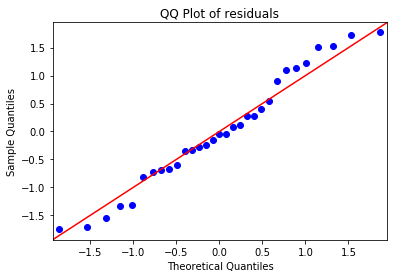

In [50]:
from matplotlib import pyplot as plt
fig = sm.qqplot(trees_df["residuals"], fit=True, line='45')
plt.title("QQ Plot of residuals")
plt.show()

Despite some of the datapoints deviating away from the line, the normality of the data is acceptable. Any more deviation than this and I would start to question whether the residuals are following a normal distribution.

## Transformations

Had this data not followed a normal distribution, we could have applied something known as a **transformation** to it. Transformations are a way of modifying our data, whether it an endogenous or exogenous variable, to improve the fit and correct violations of the statistical assumptions behind the model. We will look at two transformation strategies here, the simple $\log$ transformation, and the more powerful Box-Cox transformation. Transformations can be an iterative process, and sometimes we may have a mathematical justification for choosing a transformation, whereas some other times we might default to trial and error.

The Box-Cox transformations are given by:
$$
y^\lambda = \begin{cases} \frac{y^\lambda - 1}{\lambda} & \lambda \neq 0 \\ \log(y) & \lambda = 0 \end{cases}
$$

Where lambda will be found by maximum likelihood. We're interested in 'sensible' values of lambda - typically something that falls between (-3, 3). So if $\lambda$ was found to be 1, the transformation of $y^1 = y$. Therefore the variable doesn't change. Similarly:
<table>
    <tr>
        <td><b>Lambda</b></td>
        <td><b>Transformation</b></td>
    </tr>
    <tr>
        <td>2</td>
        <td>Square</td>
    </tr>
    <tr>
        <td>1</td>
        <td>None</td>
    </tr>
    <tr>
        <td>0.5</td>
        <td>Square root</td>
    </tr>
    <tr>
        <td>0</td>
        <td>Logarithmic</td>
    </tr>
    <tr>
        <td>-1</td>
        <td>Reciprocal</td>
    </tr>
    </table>
    
We'll look at the Box-Cox transformation first, identifying the lambda values for a variable alongside the 95% confidence interval.

In [51]:
from scipy import stats

def calculate_and_plot_boxcox(variable, alpha=0.05, title_string="", plot_lower_bound=-20, plot_upper_bound=20):
    transformed_data, best_lambda, conf = stats.boxcox(variable, alpha=alpha)
    lambdas, corr_coef = stats.boxcox_normplot(variable, plot_lower_bound, plot_upper_bound)
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=lambdas, y=corr_coef))
    fig.add_shape(dict(type="line", x0=best_lambda, x1=best_lambda, y0=0, y1=1))
    fig.add_shape(dict(type="line", x0=conf[0], x1=conf[0], y0=0, y1=1, line=dict(color="Red", width=1)))
    fig.add_shape(dict(type="line", x0=conf[1], x1=conf[1], y0=0, y1=1, line=dict(color="Red", width=1)))
    fig.add_shape(dict(type="line", x0=1, x1=1, y0=0, y1=1, line=dict(color="Red", width=1, dash="dash")))
    fig.update_layout(xaxis_title="Lambda Value", yaxis_title="Correlation Coefficient", title="Box-Cox Normality Plot ({})".format(title_string))
    
    return transformed_data, best_lambda, fig

In [52]:
transformed_h, lambda_h, fig = calculate_and_plot_boxcox(trees_df["h"], title_string="Height")
print("Obtained lambda value: ", lambda_h)
fig.show()

Obtained lambda value:  2.935266671351034


In [53]:
transformed_d, lambda_d, fig = calculate_and_plot_boxcox(trees_df["d"], title_string="Girth")
print("Obtained lambda value: ", lambda_d)
fig.show()

Obtained lambda value:  -0.2125912067969005


In [54]:
transformed_vol, lambda_vol, fig = calculate_and_plot_boxcox(trees_df["vol"], title_string="Volume")
print("Obtained lambda value: ", lambda_vol)
fig.show()

Obtained lambda value:  -0.07476605015183903


Awesome! So our plots indicate that there are some transformations of the data that could be utilised. Looking at these plots however, I would be inclined to only transform `d` and `vol`. This is because the dashed line that has been plotted represents $\lambda=1$ (which means no transformation is required). In the `h` plot, we see that the transformation would increase the correlation by a measly 0.004 (0.992 - 0.988). As previously mentioned, simpler models tend to be preferred, so the transformation here is unnecessary.

Typically, staticians and data scientists use the 'rounded' values of lambda to transform their data. We have the option to do that here too. My personal opinion here is that we should use the exact value for `d`, and rounded value for `vol`. This is because $\lambda$ for `vol` is incredible close to 0, and thus we can use a simple log transformation.

In [55]:
trees_df["transformed_d"] = transformed_d
trees_df["transformed_vol"] = np.log(trees_df["vol"])

Now, we simply fit the new model, and as before, check for plot the residuals and check for their normality 👍

In [56]:
trees_transformed_model = smf.ols("transformed_vol ~ transformed_d + h", trees_df).fit()
trees_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        transformed_vol   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     574.4
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           1.87e-23
Time:                        20:12:04   Log-Likelihood:                 34.365
No. Observations:                  31   AIC:                            -62.73
Df Residuals:                      28   BIC:                            -58.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.5921      0.236    -19.451      0.000      -5.076      -4.108
transformed_d     3.4215      0.134     25.577      0.000       3.147       3.695
h                 0.0148      0.003      5.211      0.000       0.009       0.021
==============================================================================
Omnibus:                        2.127   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.764
Skew:                          -0.570   Prob(JB):                        0.414
Kurtosis:                       2.746   Cond. No.                     1.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
trees_df["transformed_residuals"] = trees_transformed_model.resid
trees_df["transformed_fitted"] = trees_transformed_model.fittedvalues
px.scatter(trees_df, "transformed_fitted", "transformed_residuals", title="Fitted values vs model residuals (transformed data)")

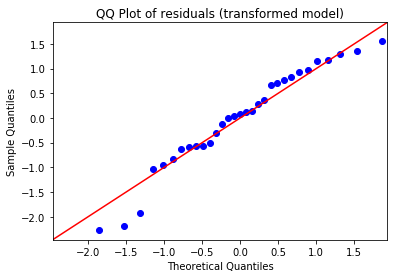

In [58]:
fig = sm.qqplot(trees_df["transformed_residuals"], fit=True, line='45')
plt.title("QQ Plot of residuals (transformed model)")
plt.show()

The heteroscedacity plot is probably slightly worse than the non-transformed variant, indicating that the transformation may *not* be valid (different data scientists would make different conclusions). Although more datapoints lie on the straight line, there are approximately 5 datapoints which deviate further than previously visualised. This is an important point - despite us doing a box-cox to transform the variable to normality, that **doesn't** ensure that our residuals would follow a normal distribution. And based on the linear regression assumptions we've outlined, the residuals following normality is more important than data itself following normality. Saying that, these points could indicate *outliers*, which we'll investigate further in the next notebook.